In [4]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.image as mpimg

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from keras.datasets import mnist

import visualkeras

In [5]:
# loading dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X = np.concatenate([X_train, X_test], axis = 0)
y = np.concatenate([y_train, y_test], axis = 0)

# reshapring 
X = X.reshape(X.shape[0], 28, 28, 1) 

# casting to float 
X.astype('float32')

# normalizing 
X = X / 255

# encoding output values
y = to_categorical(y)

In [6]:
INPUT_SHAPE = (28,28,1)
OUTPUT_SHAPE = 10
BATCH_SIZE = 6
EPOCHS = 2 
VERBOSE = 2
K_FOLDS = 10

In [7]:
def create_model():
    model = Sequential()

    model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=INPUT_SHAPE))
    model.add(MaxPool2D((2,2)))

    model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
    model.add(MaxPool2D((2,2)))

    model.add(Flatten())

    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.2))

    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.2))

    model.add(Dense(10, activation='softmax'))
    
    model.compile(
        optimizer='adam', 
        loss='categorical_crossentropy', 
        metrics=['accuracy']
    )
    
    return model

In [8]:
model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    
model = create_model()
model.fit(
    X_train, 
    y_train,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=VERBOSE,
    validation_split=0.3
)

_, score = model.evaluate(X_test, y_test, verbose = 0)

Epoch 1/2
5717/5717 - 27s - loss: 0.1942 - accuracy: 0.9420 - val_loss: 0.0671 - val_accuracy: 0.9805 - 27s/epoch - 5ms/step
Epoch 2/2
5717/5717 - 25s - loss: 0.0748 - accuracy: 0.9788 - val_loss: 0.0823 - val_accuracy: 0.9795 - 25s/epoch - 4ms/step


In [10]:
y_pred = model.predict(X_test)

657/657 [==============================] - 2s 4ms/step


In [14]:
y_actual    = [np.argmax(i) for i in y_test]
y_predicted = [np.argmax(i) for i in y_pred]

print("Accuracy:", score * 100)

Accuracy: 97.92380928993225


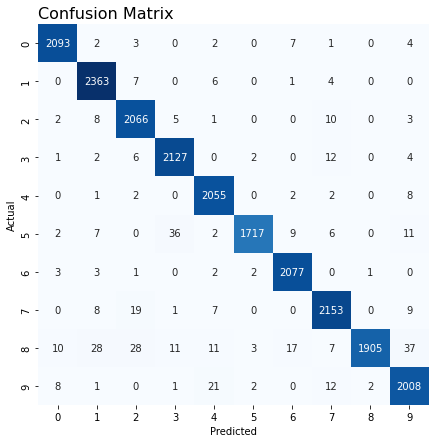

In [12]:
fig, ax = plt.subplots(figsize=(7, 7))
sns.heatmap(confusion_matrix(y_actual, y_predicted), annot=True, 
            cbar=False, fmt='1d', cmap='Blues', ax=ax)
ax.set_title('Confusion Matrix', loc='left', fontsize=16)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

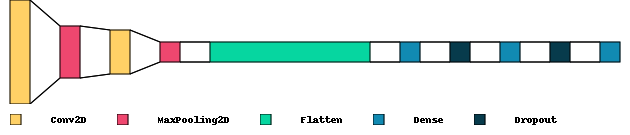

In [13]:
visualkeras.layered_view(model, legend=True, draw_volume=False,spacing=30)